In [1]:
! pip install mtcnn

     |████████████████████████████████| 2.3MB 5.4MB/s 


In [12]:
pwd

'/content'

In [2]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [16]:
#importing important libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

[[[192 180 180]
  [193 181 181]
  [193 181 181]
  ...
  [205 197 195]
  [205 197 195]
  [205 197 195]]

 [[192 180 180]
  [193 181 181]
  [193 181 181]
  ...
  [205 197 195]
  [205 197 195]
  [205 197 195]]

 [[192 180 180]
  [193 181 181]
  [193 181 181]
  ...
  [205 197 195]
  [205 197 195]
  [205 197 195]]

 ...

 [[130  92  91]
  [132  92  92]
  [133  93  93]
  ...
  [166 108 104]
  [166 108 104]
  [166 108 104]]

 [[132  94  93]
  [134  94  94]
  [134  94  94]
  ...
  [167 109 105]
  [167 109 105]
  [167 109 105]]

 [[131  93  92]
  [133  93  93]
  [134  94  94]
  ...
  [168 110 106]
  [168 110 106]
  [168 110 106]]]


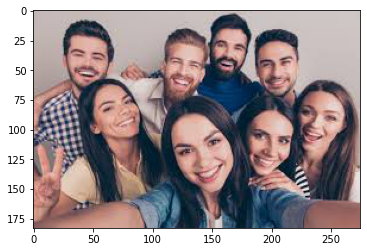

In [17]:
#lets read the image and display it
img=plt.imread('test4.jpg')
print(img)
plt.imshow(img)

In [18]:
#lets now create a detector using default weights
detector=MTCNN()
#Once the model is configured and loaded,it can be used to detect faces in photographs by calling the detect_faces() function
faces=detector.detect_faces(img)
#This returns a list of dict object, each providing a number of keys for the details of each face detected, including:
#‘box‘: Providing the x, y of the bottom left of the bounding box, as well as the width and height of the box.
#‘confidence‘: The probability confidence of the prediction.
#‘keypoints‘: Providing a dict with dots for the ‘left_eye‘, ‘right_eye‘, ‘nose‘, ‘mouth_left‘, and ‘mouth_right‘
#The bounding box is formatted as [x, y, width, height] under the key ‘box’.
#The confidence is the probability for a bounding box to be matching a face.
#The keypoints are formatted into a JSON object with the keys ‘left_eye’, ‘right_eye’, ‘nose’, ‘mouth_left’, ‘mouth_right’. Each keypoint is identified by a pixel position (x, y).
for face in faces:
    print(face)

{'box': [151, 16, 26, 38], 'confidence': 0.9999597072601318, 'keypoints': {'left_eye': (159, 29), 'right_eye': (172, 32), 'nose': (164, 38), 'mouth_left': (156, 43), 'mouth_right': (169, 46)}}
{'box': [116, 88, 52, 64], 'confidence': 0.9999063014984131, 'keypoints': {'left_eye': (129, 118), 'right_eye': (151, 110), 'nose': (143, 130), 'mouth_left': (135, 137), 'mouth_right': (158, 129)}}
{'box': [180, 87, 36, 51], 'confidence': 0.9998766183853149, 'keypoints': {'left_eye': (191, 106), 'right_eye': (209, 109), 'nose': (199, 119), 'mouth_left': (187, 122), 'mouth_right': (204, 126)}}
{'box': [221, 67, 37, 49], 'confidence': 0.9997226595878601, 'keypoints': {'left_eye': (231, 85), 'right_eye': (249, 90), 'nose': (236, 97), 'mouth_left': (226, 103), 'mouth_right': (243, 107)}}
{'box': [28, 22, 33, 42], 'confidence': 0.9997010827064514, 'keypoints': {'left_eye': (38, 37), 'right_eye': (54, 39), 'nose': (45, 45), 'mouth_left': (37, 51), 'mouth_right': (52, 54)}}
{'box': [190, 29, 31, 41], 'c

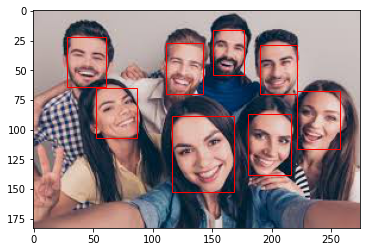

In [22]:
#Overall code for face detection using mtcnn 

#image path
image_file='test4.jpg'

#lets now create a detector using default weights
detector=MTCNN()
#Once the model is configured and loaded,it can be used to detect faces in photographs by calling the detect_faces() function
faces_coordinates=detector.detect_faces(img)
#This returns a list of dict object, each providing a number of keys for the details of each face detected, including:
#‘box‘: Providing the x, y of the bottom left of the bounding box, as well as the width and height of the box.
#‘confidence‘: The probability confidence of the prediction.
#‘keypoints‘: Providing a dict with dots for the ‘left_eye‘, ‘right_eye‘, ‘nose‘, ‘mouth_left‘, and ‘mouth_right‘
#The bounding box is formatted as [x, y, width, height] under the key ‘box’.
#The confidence is the probability for a bounding box to be matching a face.
#The keypoints are formatted into a JSON object with the keys ‘left_eye’, ‘right_eye’, ‘nose’, ‘mouth_left’, ‘mouth_right’. Each keypoint is identified by a pixel position (x, y).


#lets write a function which will draw a box around the detected faces

def face_detected_image(image_file,faces_coordinates):
    #loading the image file
    test_image=plt.imread(image_file)
    #plotting the image file
    plt.imshow(test_image)
    #Lets get the context for drawing boxes
    ax=plt.gca()
    #plotting each box
    for coordinates in faces_coordinates:
        #Getting coordinates from the box
        x,y,width,height=coordinates['box']
        #Creating the rectangular shape
        rect=plt.Rectangle((x,y),width,height,fill=False,color='red')
        #drawing the box
        ax.add_patch(rect)
    plt.show()
    

    
# display detected faces with bounding boxes
face_detected_image(image_file, faces_coordinates)

In [25]:
#lets write a function which will draw out each face separately

def draw_out_detected_face(image_file,faces_coordinates):
    #loading the image file
    test_image=plt.imread(image_file)
    #plotting the image file
    plt.imshow(test_image)
    #lets plot each detected face in a given image as a subplot
    for i in range(len(faces_coordinates)):
        #get coordinates
        x1,y1,width,height=faces_coordinates[i]['box']
        x2,y2=x1+width,y1+height
        #defining subplot
        plt.subplot(1,len(faces_coordinates),i+1)
        plt.axis('off')
        #plot face
        plt.imshow(test_image[y1:y2,x1:x2])
    #showing all the plot
    plt.show()

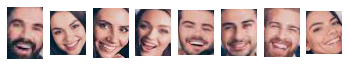

In [26]:
draw_out_detected_face(image_file,faces_coordinates)